In [1]:
import sys
sys.path.append('..')

In [2]:
# importing matplotlib module
from matplotlib import pyplot as plt
import numpy as np

%matplotlib widget

1.0
0.692820323027551
0.48000000000000015
0.3325537550532246
0.23040000000000016
0.15962580242554786


array([1.        , 0.69282032, 0.48      , 0.33255376, 0.2304    ,
       0.1596258 ])

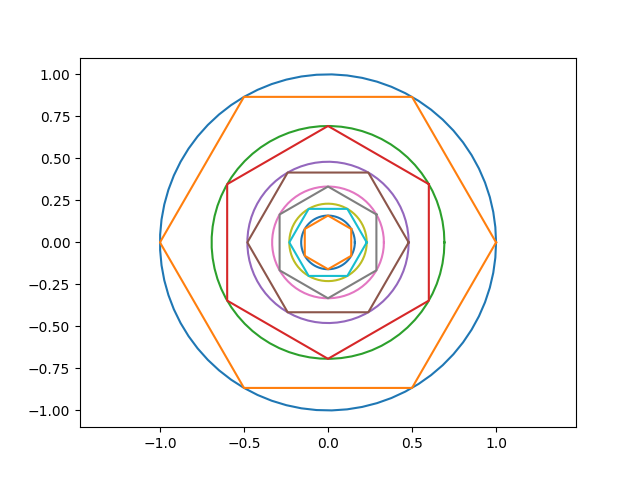

In [3]:
theta = np.linspace(0, 2*np.pi, 70)
x, y = np.cos(theta), np.sin(theta)

n = 6
rho = np.linspace(0, 2*np.pi, n+1)
xp, yp = np.cos(rho), np.sin(rho)
xp2, yp2 = np.cos(rho+np.pi/n), np.sin(rho+np.pi/n)

ri = np.cos(np.pi/n)

fig, ax = plt.subplots()

gamma = .8
ri *= gamma
for i in range(6):
    ax.plot((ri**i)*x, (ri**i)*y)
    if i % 2 == 0:
        ax.plot((ri**i)*xp, (ri**i)*yp)
    else:
        ax.plot((ri**i)*xp2, (ri**i)*yp2)
    print(ri**i)

ax.axis('equal')
ri**np.arange(6)

In [2]:
from tensegrity.plotter import MatplotlibPlotter
from tensegrity.structure import Structure

# hexagon frames

radius = 1
height = .4
alpha = np.pi/3

theta = alpha * np.arange(6)

# h(x) = (h/r^2) x^2
# h(r) = (h/r^2) r^2 = h
n = 6
rs = radius * np.flipud(np.linspace(1/n, 1, n))
hs = (height/(radius**2)) * rs ** 2
rs, hs

nodes = np.zeros((3,0))
members = np.zeros((2,0))
for i, (radius, height) in enumerate(zip(rs, hs)):
    rho = alpha*i/2
    nodes = np.hstack((
        nodes,
        np.vstack((radius * np.sin(theta-rho), radius * np.cos(theta-rho), height * np.ones(6)))
    ))
    members = np.hstack((
        members,
        6*i + np.vstack((np.arange(6), np.mod(np.arange(6)+1, 6)))
    ))
print(members.shape)
for i in range(n-1):
    members = np.hstack((
        members,
        np.vstack((members[0, 6*i+np.arange(6)], members[0, 6*(i+1)+np.arange(6)])),
        np.vstack((members[0, 6*i+np.arange(6)], members[1, 6*(i+1)+np.arange(6)]))
    ))
# nodes, members

s = Structure(nodes=nodes, members=members, number_of_strings=0)

(2, 36)


(-0.9619016267270982,
 1.2567345880323995,
 -1.109318107379749,
 1.109318107379749)

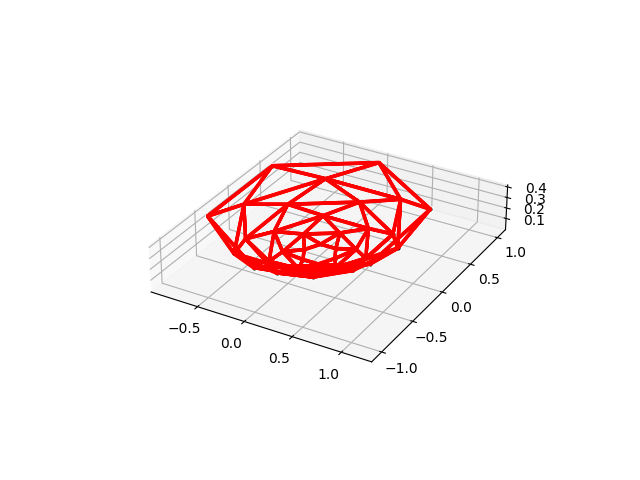

In [3]:
plotter = MatplotlibPlotter(s)
fig, ax = plotter.plot()
ax.axis('square');
# fig.show()

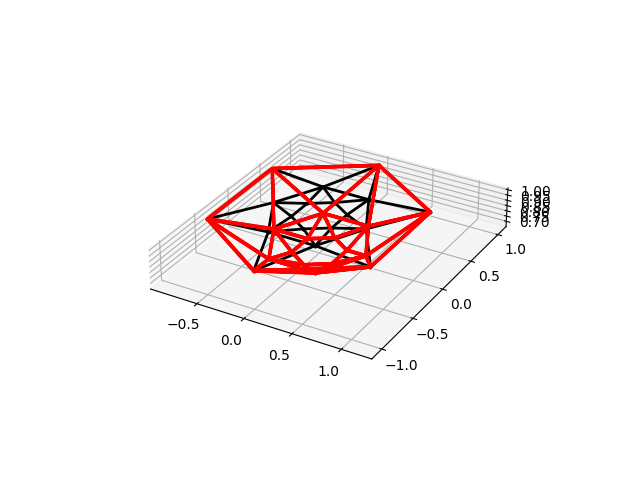

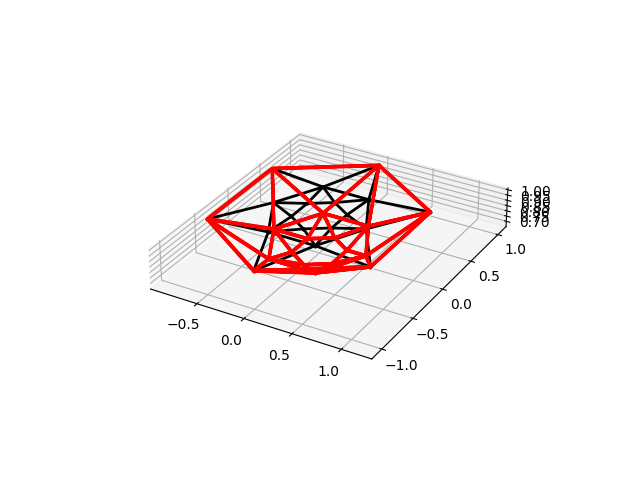

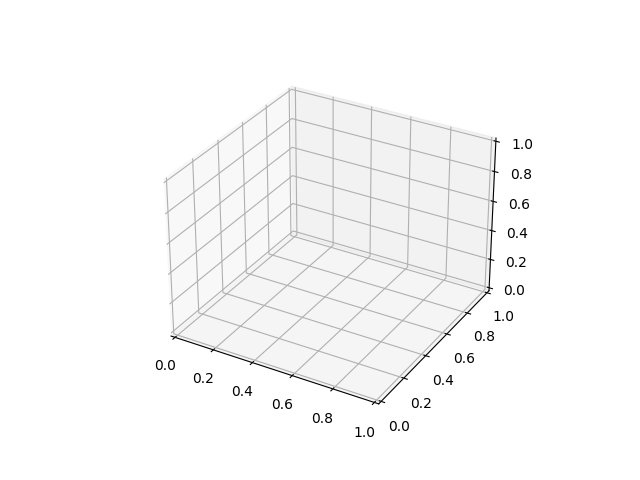

In [3]:
nodes1 = np.vstack((radius * np.sin(theta), radius * np.cos(theta), height * np.ones(6)))
nodes2 = np.vstack(((radius/2) * np.sin(theta-alpha/2), (radius/2) * np.cos(theta-alpha/2), (3*height/4) * np.ones(6)))
nodes3 = np.vstack(((radius/4) * np.sin(theta-alpha), (radius/4) * np.cos(theta-alpha), (2*height/3) * np.ones(6)))
nodes4 = np.vstack(((radius/2) * np.sin(theta-alpha/2), (radius/2) * np.cos(theta-alpha/2), height * np.ones(6)))
nodes5 = np.vstack(((radius/4) * np.sin(theta-alpha), (radius/4) * np.cos(theta-alpha), height * np.ones(6)))

nodes = np.hstack((nodes1, nodes2, nodes3, nodes4, nodes5))

bars1 = np.array([
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 0]
]).transpose()
bars2 = 6 + bars1
bars3 = 12 + bars1
bars12 = np.hstack((
    np.vstack((bars1[0, :], bars2[0, :])),
    np.vstack((bars1[0, :], bars2[1, :]))
))
bars23 = np.hstack((
    np.vstack((bars2[0, :], bars3[0, :])),
    np.vstack((bars2[0, :], bars3[1, :]))
))
strings2 = 18 + bars1
strings3 = 24 + bars1
strings12 = np.hstack((
    np.vstack((bars1[0, :], strings2[0, :])),
    np.vstack((bars1[0, :], strings2[1, :]))
))
strings23 = np.hstack((
    np.vstack((strings2[0, :], strings3[0, :])),
    np.vstack((strings2[0, :], strings3[1, :]))
))
members = np.hstack((strings2, strings3, strings12, strings23, bars1, bars2, bars3, bars12, bars23))

s = Structure(nodes=nodes, members=members, number_of_strings=36)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plotter = MatplotlibPlotter(s)
plotter.plot(ax=ax)

ax.axis('square')
fig.show()

In [1]:
# importing matplotlib module
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib widget

import sys
sys.path.append('..')

In [10]:
from tensegrity.plotter import MatplotlibPlotter
from tensegrity.structure import Structure
from tensegrity.snelson import Snelson

s = Structure(nodes=np.array([[1,0,0],[0,1,0],[0,0,1]]), members=[[0,1,2],[1,2,0]], number_of_strings = 1)
s = Snelson()
s.member_tags

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plotter = MatplotlibPlotter(s)
plotter.plot(ax=ax)

In [ ]:
from typing import get_type_hints
hints = get_type_hints(Structure.MemberProperty)
df=pd.DataFrame(columns=hints.keys()).astype(dtype=hints)
df.set_index('member_id')

In [ ]:
df.dtypes

In [8]:
X = np.array([[1,2,3,4],[5,6,7,8]])
np.vstack((X[0,:],X[1,:])).T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])